<a href="https://colab.research.google.com/github/ataniazov/Advanced-Probability-for-Discrete-Systems/blob/master/random_variable/flip_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import random
from enum import Enum, auto

In [2]:
class Coin(Enum):
  HEAD = auto()    # HEADS
  TAIL = auto()    # TAILS

print(list(Coin))

print()

print("Coin:")

for coin in Coin:
  print(coin.name)

print()

[<Coin.HEAD: 1>, <Coin.TAIL: 2>]

Coin:
HEAD
TAIL



In [3]:
fliptimes = 3

results = []

for flip in range(fliptimes):
  results.append(random.choice(list(Coin)))

print("Flip results:")
for result in results:
  print(result.name, end = ' ')


Flip results:
TAIL TAIL HEAD 

In [0]:
def increment(arr):
    last = n - 1
    cut_off = len(states) - 1
 
    arr[last] += 1
 
    for i in range(last, 0, -1):
        if arr[i] > cut_off:
            arr[i] = 0
            arr[i - 1] += 1
        else:
            break
    return arr
 
def permutations(states, n):
    if len(states) <= 1: return
    if n == 0: return
 
    current = [0] * n
 
    out = []
    count = 0
 
    possibilities = len(states)**n
 
    while count < possibilities:
        new_permutation = []
 
        for i in range(0, n):
            j = current[i]
            new_permutation += [states[j]]
        out += [new_permutation]
 
        count += 1
        current = increment(current)
 
    return out

In [5]:
states = list(Coin)
n = fliptimes

SampleSpace = permutations(states, n)

print("Sample Space:")
for flips in SampleSpace:
  for coin in flips:
    print(coin.name, end = ' ')
  print()

Sample Space:
HEAD HEAD HEAD 
HEAD HEAD TAIL 
HEAD TAIL HEAD 
HEAD TAIL TAIL 
TAIL HEAD HEAD 
TAIL HEAD TAIL 
TAIL TAIL HEAD 
TAIL TAIL TAIL 


In [6]:
X = Coin.TAIL
print("X =",X.name)

print()

RandomVariable = []

for flips in SampleSpace:
  occurrence = flips.count(X)
  if occurrence not in RandomVariable:
    RandomVariable.append(occurrence)
  for coin in flips:
    print(coin.name, end = ' ')
  print("=>", occurrence)

print()

print("Random Variable:")

RandomVariable.sort()

print(RandomVariable)

X = TAIL

HEAD HEAD HEAD => 0
HEAD HEAD TAIL => 1
HEAD TAIL HEAD => 1
HEAD TAIL TAIL => 2
TAIL HEAD HEAD => 1
TAIL HEAD TAIL => 2
TAIL TAIL HEAD => 2
TAIL TAIL TAIL => 3

Random Variable:
[0, 1, 2, 3]


In [0]:
states = list(Coin)
samplespace = SampleSpace
one_event_prob = 1 / len(states)

def P_X_x(event, occr_num):
  result = 0
  event_prob = 1
  for events in samplespace:
    event_prob = 1
    occurrence = events.count(event)
    if occurrence == occr_num:
      for e in events:
        event_prob *= one_event_prob
      result += event_prob
  return result

In [8]:
print("P(X=0) =", P_X_x(X, 0))
print("P(X=1) =", P_X_x(X, 1))
print("P(X=2) =", P_X_x(X, 2))
print("P(X=3) =", P_X_x(X, 3))

P(X=0) = 0.125
P(X=1) = 0.375
P(X=2) = 0.375
P(X=3) = 0.125


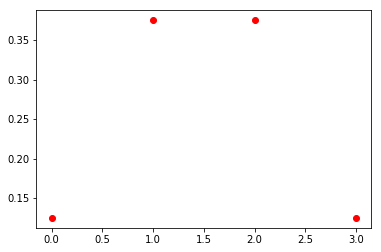

In [9]:
PX = []

for i in RandomVariable:
  PX.append(P_X_x(X, i))


plt.plot(RandomVariable, PX, "ro")